Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:
library("tidymodels")



Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching packages ────────────────────────────────────── tidymodels 1.4.1 ──

✔ broom        1.0.9     ✔ recipes      1.3.1
✔ dials        1.4.2     ✔ rsample      1.3.1
✔ dplyr        1.1.4     ✔ tailor       0.1.0
✔ ggplot2      3.5.2     ✔ tidyr        1.3.1
✔ infer        1.0.9     ✔ tune         2.0.0
✔ modeldata    1.5.1     ✔ workflows    1.3.0
✔ parsnip      1.3.3     ✔ workflowsets 1.1.1
✔ purrr        1.1.0     ✔ yardstick    1.3.2

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [3]:
diabetes = readr::read_csv('diabetes.csv', show_col_types = F) |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Glimpse the `diabetes_train` table.

In [4]:
glimpse(diabetes_train)

Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 5, 10, 10, 1, 3, 8, 1, 13, 5, 5, 3, 6, …
$ Glucose                  <dbl> 85, 89, 116, 115, 139, 103, 126, 99, 97, 145,…
$ BloodPressure            <dbl> 66, 66, 74, 0, 80, 30, 88, 84, 66, 82, 92, 75…
$ SkinThickness            <dbl> 29, 23, 0, 0, 0, 38, 41, 0, 15, 19, 0, 26, 11…
$ Insulin                  <dbl> 0, 94, 0, 0, 0, 83, 235, 0, 140, 110, 0, 0, 5…
$ BMI                      <dbl> 26.6, 28.1, 25.6, 35.3, 27.1, 43.3, 39.3, 35.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.201, 0.134, 1.441, 0.183, 0.7…
$ Age                      <dbl> 31, 21, 30, 29, 57, 33, 27, 50, 22, 57, 38, 6…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**  Outcome since all others are doubles

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     |  Plasma glucose concentration a 2 hours in an oral glucose tolerance test    |
| BMI         |  Body mass index (weight in kg/(height in m)^2)     |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

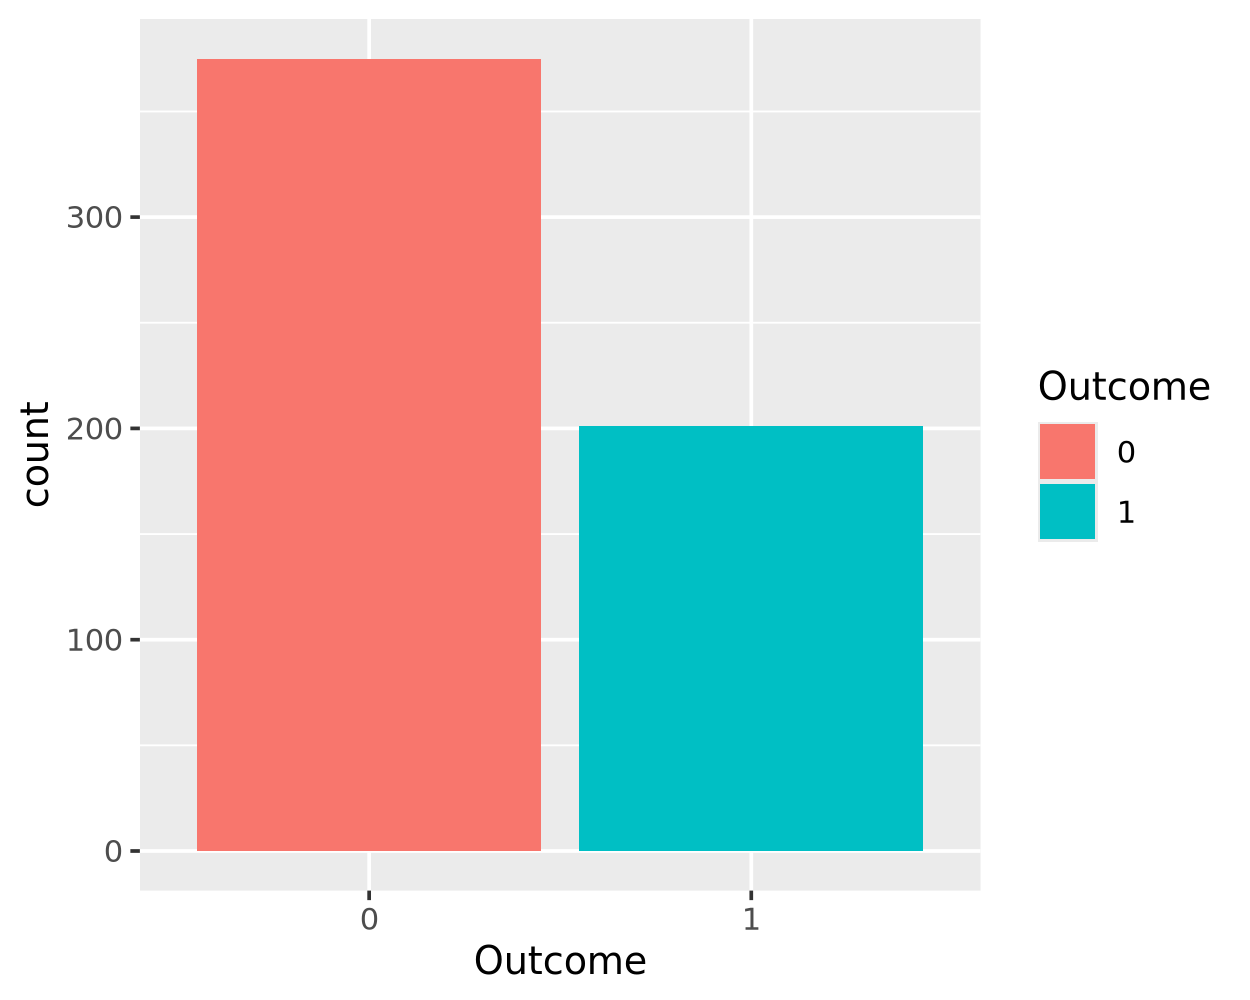

In [5]:
library(ggplot2)

ggplot(diabetes_train, aes(x = Outcome, fill = Outcome)) +
  geom_bar()

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:** No we do not. Outcome equalling 0 heavily out does the outcome equalling 1

Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [6]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

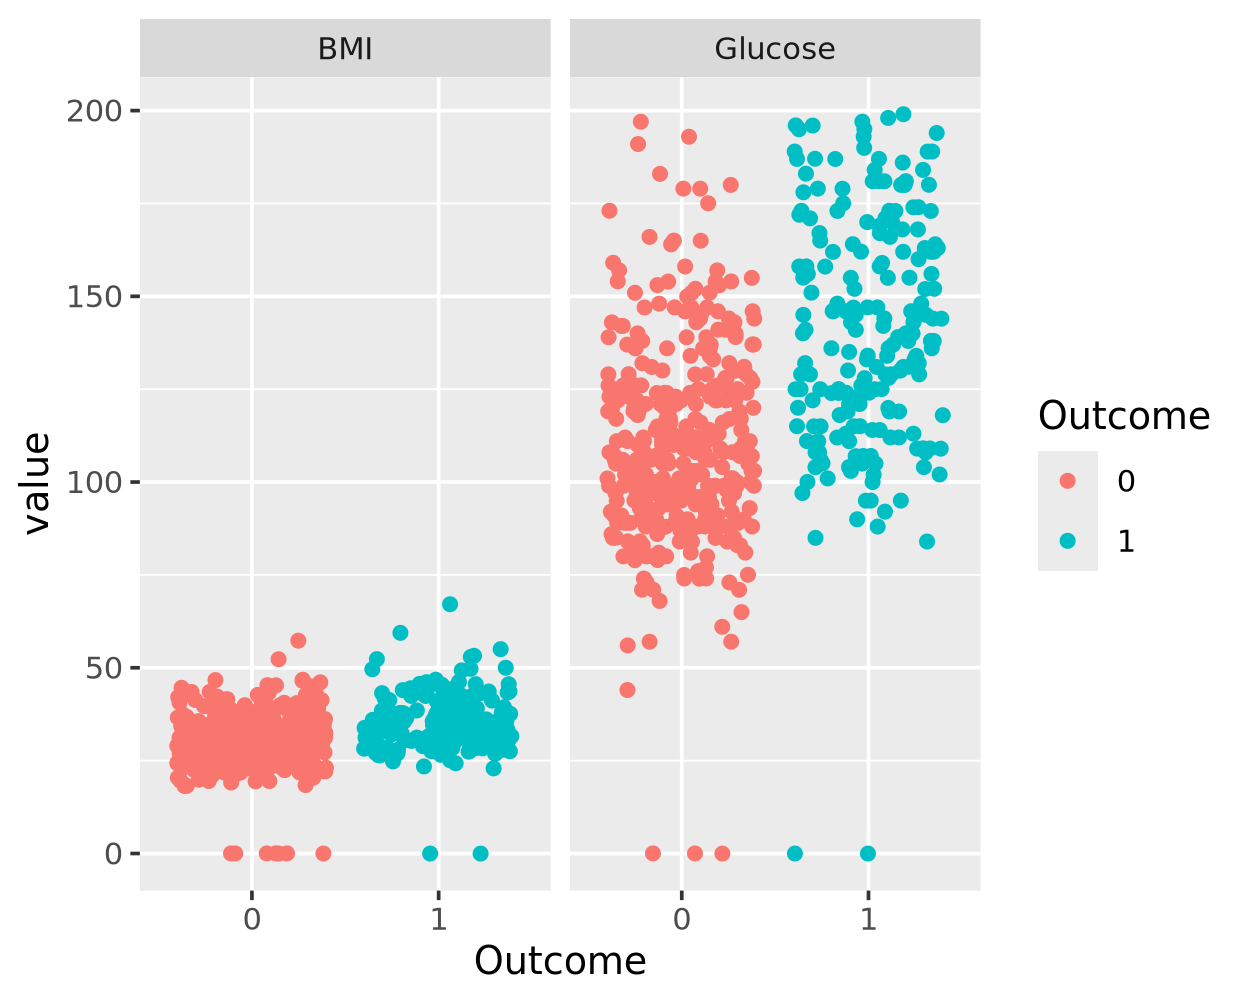

In [8]:
ggplot(plot_df, aes(x = Outcome, y = value, color = Outcome)) +
    geom_jitter() +
    facet_wrap(~name, ncol = 2, scales = 'free_x')

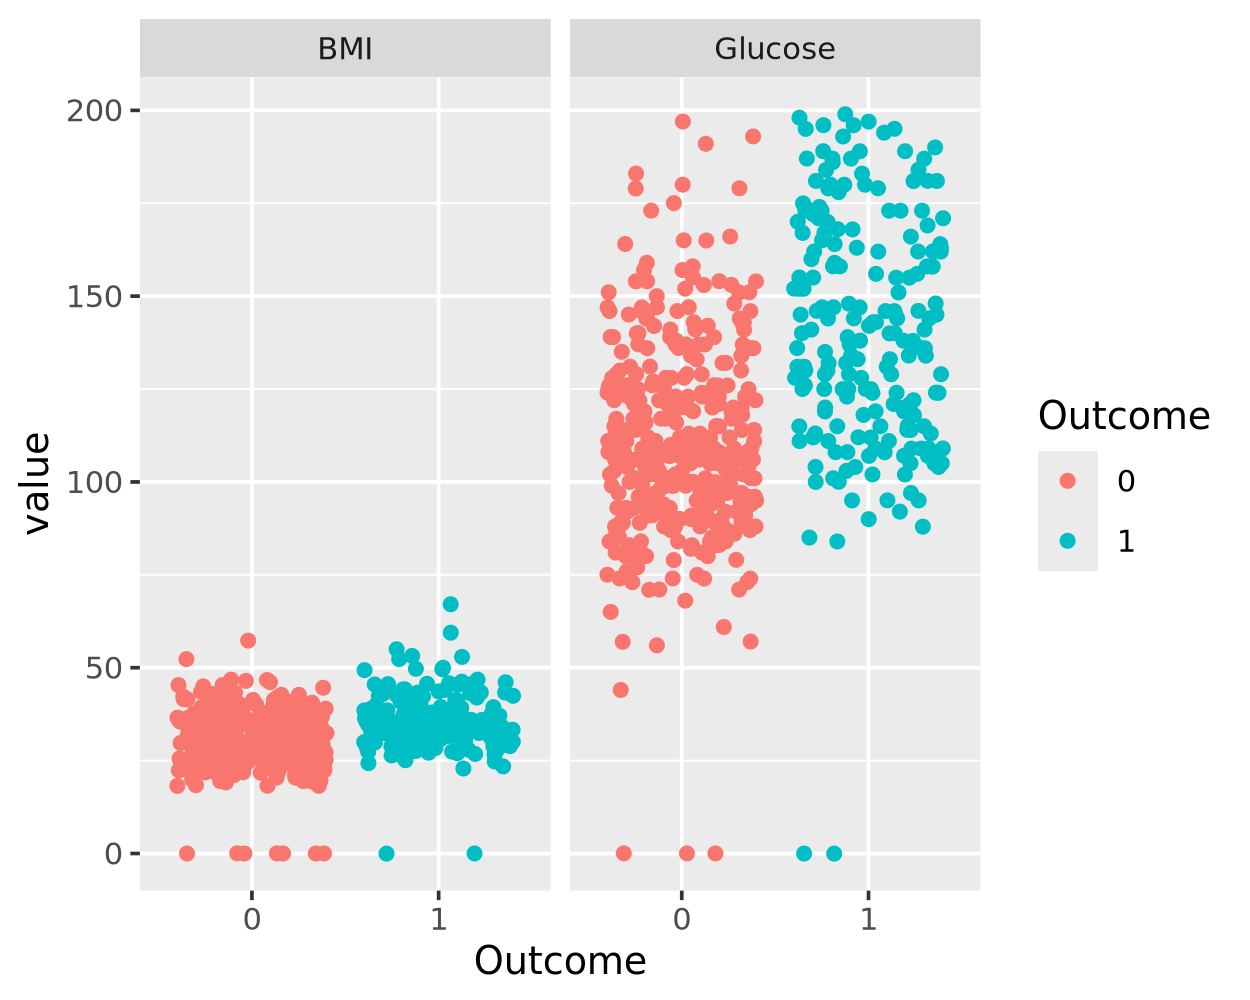

In [9]:
ggplot(plot_df, aes(x = Outcome, y = value, color = Outcome)) +
    geom_jitter() +
    facet_wrap(~name, ncol = 2)

❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**  It looks like a little shift in some of the data points but not much of a difference

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [10]:
log_spec <- logistic_reg() |>
  set_engine("glm") 

log_fit <- log_spec |>
  fit(Outcome ~ BMI + Glucose, data = diabetes_train)

tidy(log_fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-6.98569577,0.658381879,-10.610401,2.666023e-26
BMI,0.07036370,0.014883811,4.727533,2.272645e-06
Glucose,0.03241928,0.003745612,8.655270,4.917444e-18


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [11]:
diabetes_test_wPred <- augment(log_fit, new_data = diabetes_test)

head(diabetes_test_wPred)

.pred_class,.pred_0,.pred_1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.4559697,0.54403031,6,148,72,35,0,33.6,0.627,50,1
1,0.3574366,0.64256340,8,183,64,0,0,23.3,0.672,32,1
0,0.9068459,0.09315415,3,78,50,32,88,31.0,0.248,26,1
0,0.6843638,0.31563620,4,110,92,0,0,37.6,0.191,30,0
1,0.4473734,0.55262658,5,166,72,19,175,25.8,0.587,51,1
0,0.8365606,0.16343945,7,100,0,0,0,30.0,0.484,32,1


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [13]:
diabetes_test_wPred = augment(log_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 118  30
         1   7  37

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?  37
- Of those that actually had diabetes, how many were predicted to have diabetes by your model? 30
- How many individuals predicted to have diabetes did not have diabetes? 7

**Answer:**